# Exercise 5: Time-delay Embedding (Task 4: Part 2 (Lorenz))

In [29]:
# All imports
import matplotlib.pyplot as plt
import numpy as np
from utils import *
from scipy.integrate import solve_ivp

%reload_ext autoreload
%autoreload 2
# TODO: Import necessary python files to simulate the lorenz attractor from the previous exercise

### TODO: Generate data for Lorenz attractor (using prev exercise)

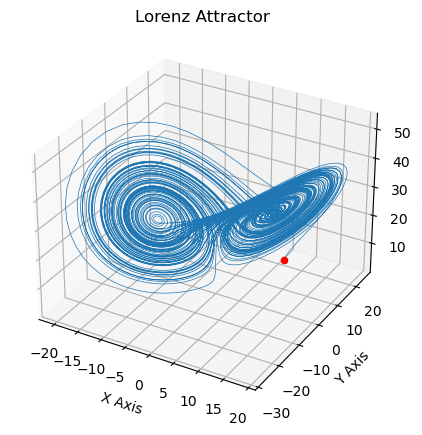

In [4]:
# TODO: Generate lorenz_dataectory data by simulating the Lorenz attractor
# TODO: Visualize lorenz attractor
# Define Lorenz system
def lorenz (t, state , sigma , beta , rho ):
    x, y, z = state
    dx = sigma * (y - x)
    dy = x * ( rho - z) - y
    dz = x * y - beta * z
    return [dx , dy , dz]

 # Parameters and initial state
sigma , beta , rho = 10, 8/3 , 28
initial_state = [10 , 10, 10]

 # Solve ODE
sol = solve_ivp(lorenz , [0, 1000] , initial_state , args =( sigma , beta , rho ), t_eval =np.
linspace (0, 1000 , 10000) )

# implementation on matplotlib page
def lorenz_(xyz, *, s=10, r=28, b=2.667):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot])


dt = 0.01
num_steps = 10000

xyzs = np.empty((num_steps + 1, 3))  # Need one more for the initial values
xyzs[0] = (10, 10, 10)  # Set initial values
# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz_(xyzs[i]) * dt

 # Plot trajectory
fig = plt.figure('Lorenz attractors', (10,5))

# Plot
ax_2 = fig.add_subplot(projection='3d')
ax_2.scatter(10,10,10, color='r')
ax_2.plot(*xyzs.T,lw=0.5)
ax_2.set_xlabel("X Axis")
ax_2.set_ylabel("Y Axis")
ax_2.set_zlabel("Z Axis")
ax_2.set_title("Lorenz Attractor")

plt.show()

### TODO: Create and visualize time-delayed x coordinates from Lorenz data in a 3-d Euclidean space


(0.0, 5000.0)

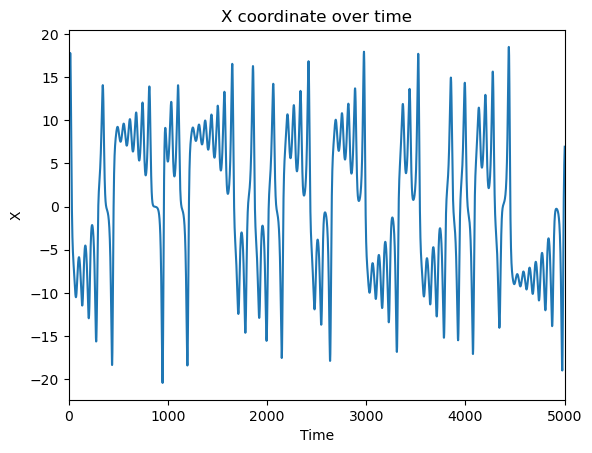

In [9]:
x = xyzs[:,0]
time = np.arange(len(x))
plt.plot(time,x)
plt.xlabel("Time")
plt.ylabel("X")
plt.title("X coordinate over time")
plt.xlim(0,5000)

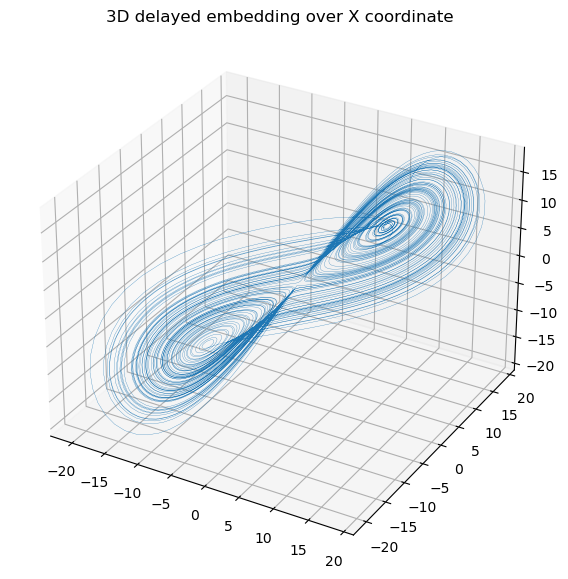

In [13]:
# Hint: Use method time_delay from utils.py
delta_t = 5
delayed_x = time_delay(xyzs,0, delta_t=delta_t,out_dim=3)
x_2 = delayed_x[:,2]
x_1 = delayed_x[:,1]
x_0 = delayed_x[:,0]

ax = plt.figure(figsize=(7,7)).add_subplot(projection='3d')
ax.plot(x_0,x_1, x_2, lw=0.2)
ax.set_title("3D delayed embedding over X coordinate")
plt.show()

### TODO: Create and visualize time-delayed z coordinates from Lorenz data in a 3-d Euclidean space


(0.0, 2500.0)

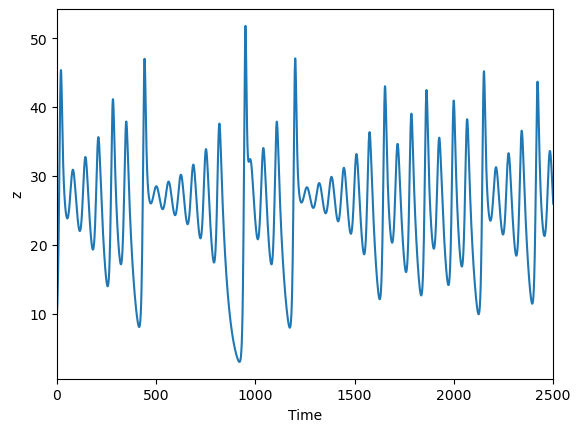

In [14]:
z = xyzs[:,2]
time = np.arange(len(z))
plt.plot(time,z)
plt.xlabel("Time")
plt.ylabel("z")
plt.xlim(0,2500)

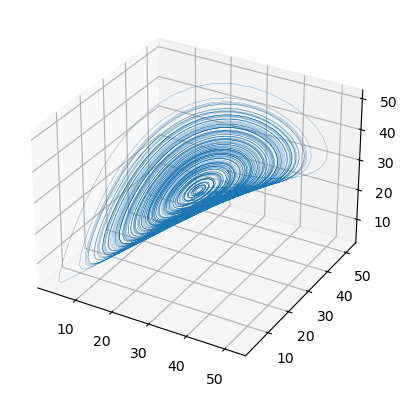

In [15]:
# Hint: Use method time_delay from utils.py
# Hint: Use method time_delay from utils.py
delayed_z = time_delay(xyzs,2, delta_t=delta_t,out_dim=3)
z_2 = delayed_z[:,2]
z_1 = delayed_z[:,1]
z_0 = delayed_z[:,0]

ax = plt.figure().add_subplot(projection='3d')
ax.plot(z_0,z_1, z_2, lw=0.2)
plt.show()

Embedding with z coordinates does not work.

### TODO: Bonus task
Approximating vector field

In [16]:
# computing vector field v, delta_t=1 in between 2 consecutive rows
v = np.diff(delayed_x, axis=0)

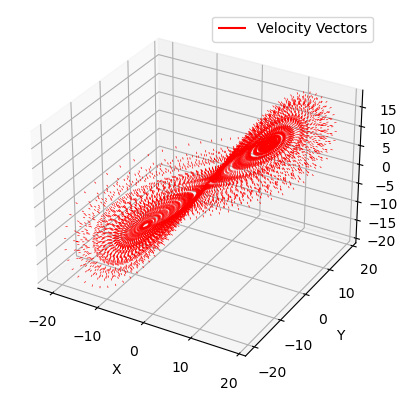

In [17]:
# Midpoints for vector plotting (optional)
midpoints = (delayed_x[:-1] + delayed_x[1:]) / 2

# Plotting the vector field
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Original points
#ax.plot(delayed_x[:, 0], delayed_x[:, 1], delayed_x[:, 2], 'o-', label='Trajectory')

# Quiver plot for velocity vectors
ax.quiver(midpoints[:, 0], midpoints[:, 1], midpoints[:, 2],
          v[:, 0], v[:, 1], v[:, 2],
          length=0.1, normalize=True, color='r', label='Velocity Vectors')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

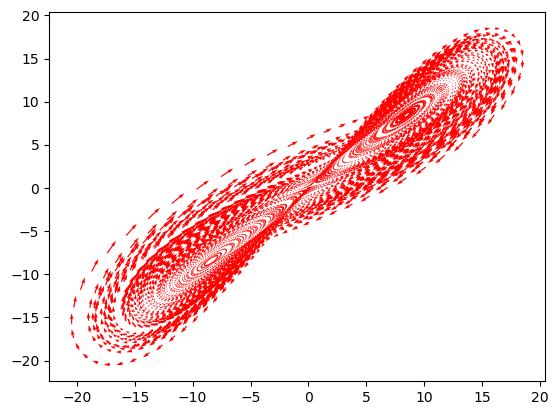

In [18]:
plt.quiver(midpoints[:, 0], midpoints[:, 1],
          v[:, 0], v[:, 1], color='r', label='Velocity Vectors')

In [67]:
#SOLVING THE DIFFERENTIAL EQUATION

In [19]:
L = 150
#x = np.linspace(-4.5, 4.5, L)
centers = 42*np.random.random_sample((L,3)) -21

In [28]:
radial_basis_function(delayed_x[:len(v)], centers, 0.185).shape

(150, 9990)

In [35]:
phi = approx_non_linear_field(delayed_x[:len(v)],centers, 0.185)
C =  linear_fit(phi, v)

In [36]:
C

array([ 1.31305703,  0.13575374, -0.89563333])

In [41]:
#phi = approx_non_linear_field(delayed_x[:len(v)],centers, 0.185)
#C =  least_squares(phi.T, v)
approx_field, C = non_linear_fit_transform(delayed_x[:len(v)],v, centers, 0.185)
def g(t, y):
    y = y.reshape(-1,3)
    phi = approx_non_linear_field(y,centers, 0.185)
    #C =  least_squares(phi_.T, v)
    #return np.dot(phi_.T,C).flatten()
    return transform(phi,C).flatten()

mean_squared_error(v, approx_field)

0.0002688993997412436

In [117]:
#delta_T = 0.01
T_end = 1000
t_eval =np.linspace (0, T_end , T_end)
SOL = solve_ivp(g, [0,T_end], delayed_x[:100].flatten(), t_eval= t_eval)

In [118]:
solutions = SOL.y.T
#traj_estim = solutions[:,0:3]
#traj_estim_2 = solutions[:,4:7]
#traj_estim_3 = solutions[:,4400:4403]

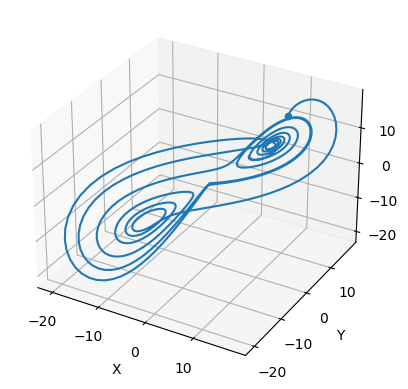

In [119]:
# Plotting trajectories
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(*delayed_x[:T_end].T)
ax.scatter(*delayed_x[0])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

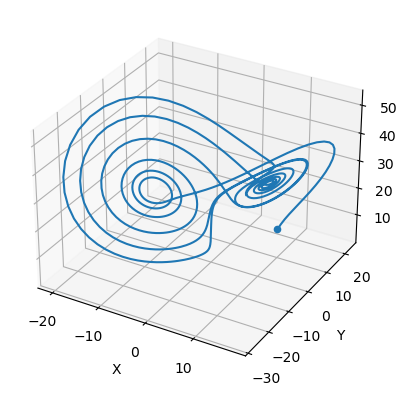

In [120]:
# Plotting trajectories
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(*xyzs[:T_end].T)
ax.scatter(*xyzs[0])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

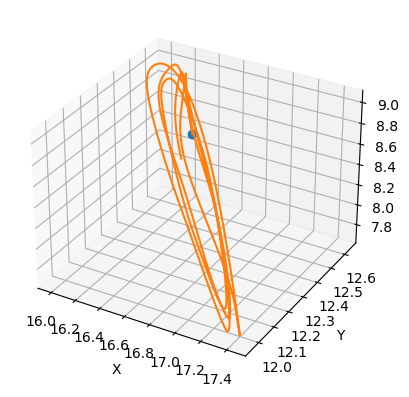

In [124]:
# Plotting trajectories
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#ax.plot(*traj_estim.T)
#ax.plot(*traj_estim_2.T)
ax.plot(*solutions[600,30:33], marker= 'o')
ax.plot(*solutions[600:,30:33].T)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()